Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.43      0.46      0.44        13
           2       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45



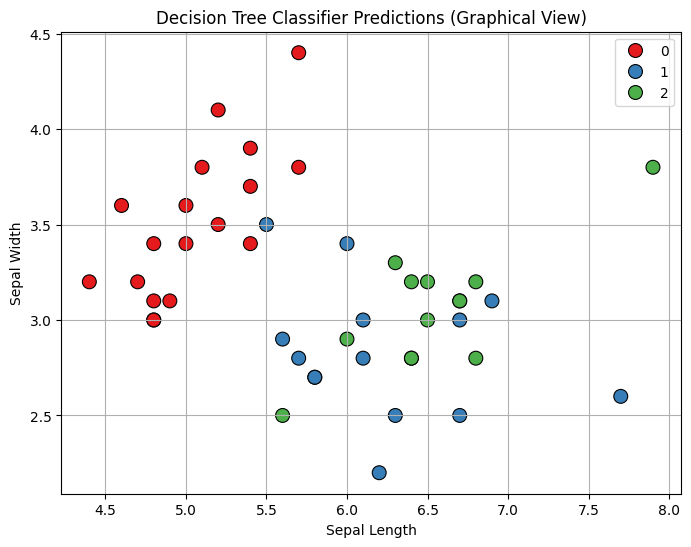

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("iris.csv")

# Map class names to integers
df['variety'] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

# Features and labels
X = df.drop("variety", axis=1)
y = df["variety"]

# Use first two features for easier 2D visualization
X_vis = X[["sepal.length", "sepal.width"]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Graphical representation using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["sepal.length"], y=X_test["sepal.width"], hue=y_pred,
                palette="Set1", s=100, edgecolor="k")
plt.title("Decision Tree Classifier Predictions (Graphical View)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()
